In [2]:
from jaeger_parser import JaegerParser
from graphviz import Digraph
import json

In [3]:
def draw_graph(tree, name, rule=[]):
    dot = Digraph(name)
    tree.todot(dot, rule)
    return dot

In [4]:
fp = open("trace.json", "r")
json.loads(fp.read())

{'data': [{'traceID': '3cd73ec67bde24a8348188615445f9d4',
   'spans': [{'traceID': '3cd73ec67bde24a8348188615445f9d4',
     'spanID': '47457d38c995a04e',
     'operationName': 'kubernetes:kubernetesenv.istio-system(kubernetesenv)',
     'references': [{'refType': 'CHILD_OF',
       'traceID': '3cd73ec67bde24a8348188615445f9d4',
       'spanID': '271022fcd05956f'}],
     'startTime': 1563326342252502,
     'duration': 113,
     'tags': [{'key': 'component', 'type': 'string', 'value': 'istio-mixer'}],
     'logs': [{'timestamp': 1563326342252614,
       'fields': [{'key': 'adapter',
         'type': 'string',
         'value': 'kubernetesenv'},
        {'key': 'error', 'type': 'string', 'value': 'false'},
        {'key': 'handler',
         'type': 'string',
         'value': 'kubernetesenv.istio-system'},
        {'key': 'meshFunction', 'type': 'string', 'value': 'kubernetes'},
        {'key': 'response_code', 'type': 'string', 'value': 'OK'},
        {'key': 'response_message', 'type':

In [5]:
p = JaegerParser("trace.json")
root = p.process()

root.labels


{'traceID': '3cd73ec67bde24a8348188615445f9d4',
 'spanID': '348188615445f9d4',
 'operationName': 'productpage.default.svc.cluster.local:9080/productpage',
 'startTime': 1563326342240694,
 'duration': 97786,
 'processID': 'p5',
 'component': 'proxy',
 'node_id': 'router~10.1.0.195~istio-ingressgateway-697bb8b4cc-6zkt4.istio-system~istio-system.svc.cluster.local',
 'guid:x-request-id': '22023ec5-f2ad-96b4-9a46-46f092abbeda',
 'http.url': 'http://localhost/productpage',
 'http.method': 'GET',
 'downstream_cluster': '-',
 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
 'http.protocol': 'HTTP/1.1',
 'request_size': '0',
 'upstream_cluster': 'outbound|9080||productpage.default.svc.cluster.local',
 'http.status_code': '200',
 'response_size': '5286',
 'response_flags': '-',
 'span.kind': 'client',
 'serviceName': 'istio-ingressgateway',
 'process-ip': '10.1.0.195'}

In [6]:
root.label_values()

{'traceID': ['3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4',
  '3cd73ec67bde24a8348188615445f9d4'],
 'spanID': ['348188615445f9d4',
  '24a546c54ec44312',
  '94af4f4226bd4265',
  '86ca9d34d8bb0187',
  'dc9c6bf062c4da0e',
  '271022fcd05956f',
  '47457d38c995a04e',
  'cc583ea1a012a468',
  '4417aa5601b925b6',
  'baa123a0ef04680a',
  'e36e1ddffd78c8c',
  'd2a01d95d0a4d21',
  'cee7b24edb58aa9e',
  '89a141f920fbe3e2',
  'c60a4d0e38450012',
  '4a

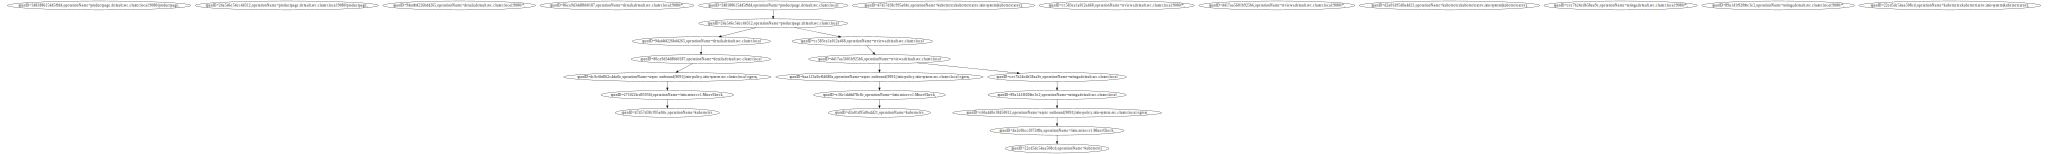

In [8]:
rules_raw = {
    #'serviceName' : 'lambda x : x',
    'spanID' : 'lambda x : x',
    'operationName' : 'lambda x : x',
}

draw_graph(root.transform(rules_raw), "raw2")
#t = p.root.transform(rules_raw)
#p.root.labels

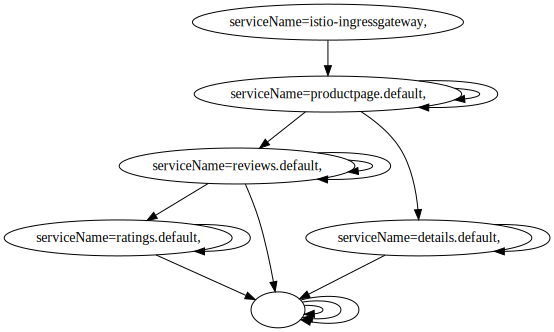

In [19]:
rules_simple = { 'transform': { 'serviceName' : 'lambda x : x' },
                'excise' : {'serviceName' : 'lambda x: x.startswith("istio-mixer")'}
               }

draw_graph(root.transform(rules_simple), "simple")

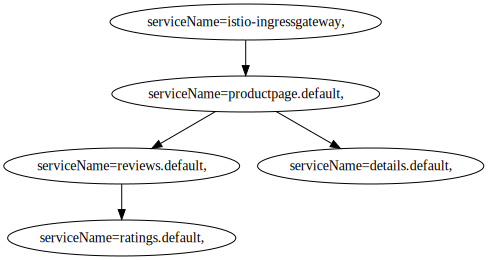

In [20]:
draw_graph(root.transform(rules_simple).collapse(), "simple")

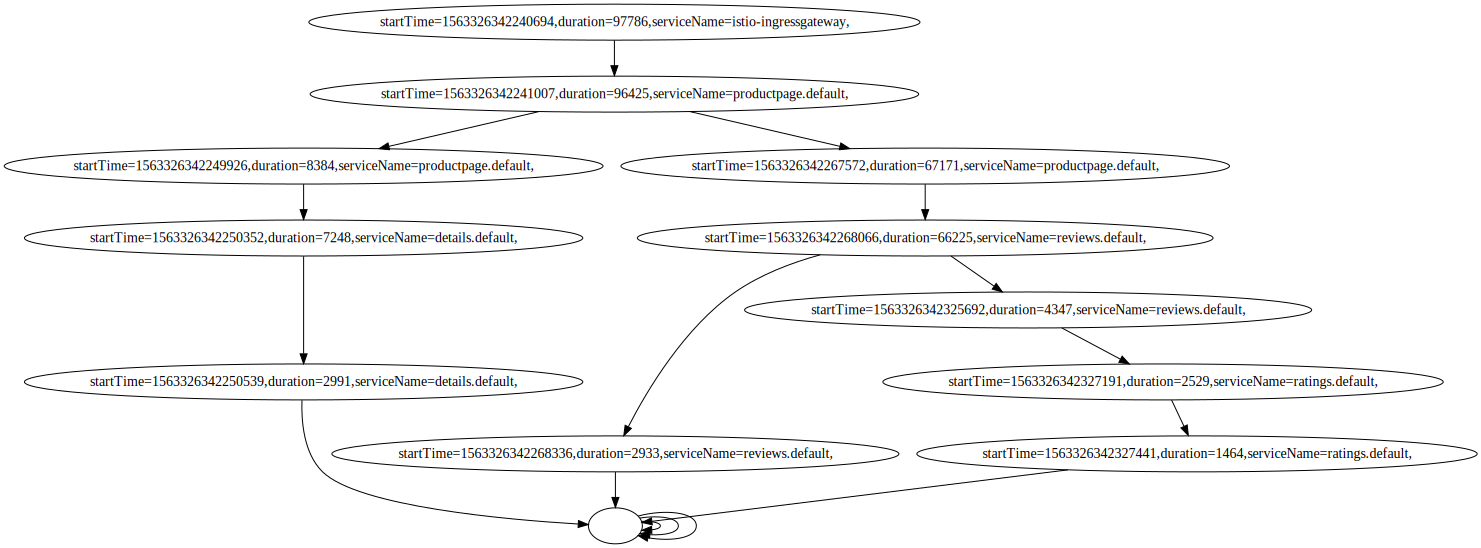

In [25]:
rules_timing = { 'transform' : {'serviceName' : ' ', 'startTime': 'lambda x : x', 'duration' : 'lambda x : x'},
                 'excise' : {'serviceName' : 'lambda x: x.startswith("istio-mixer")'}
               }
draw_graph(root.transform(rules_timing), 'timing')

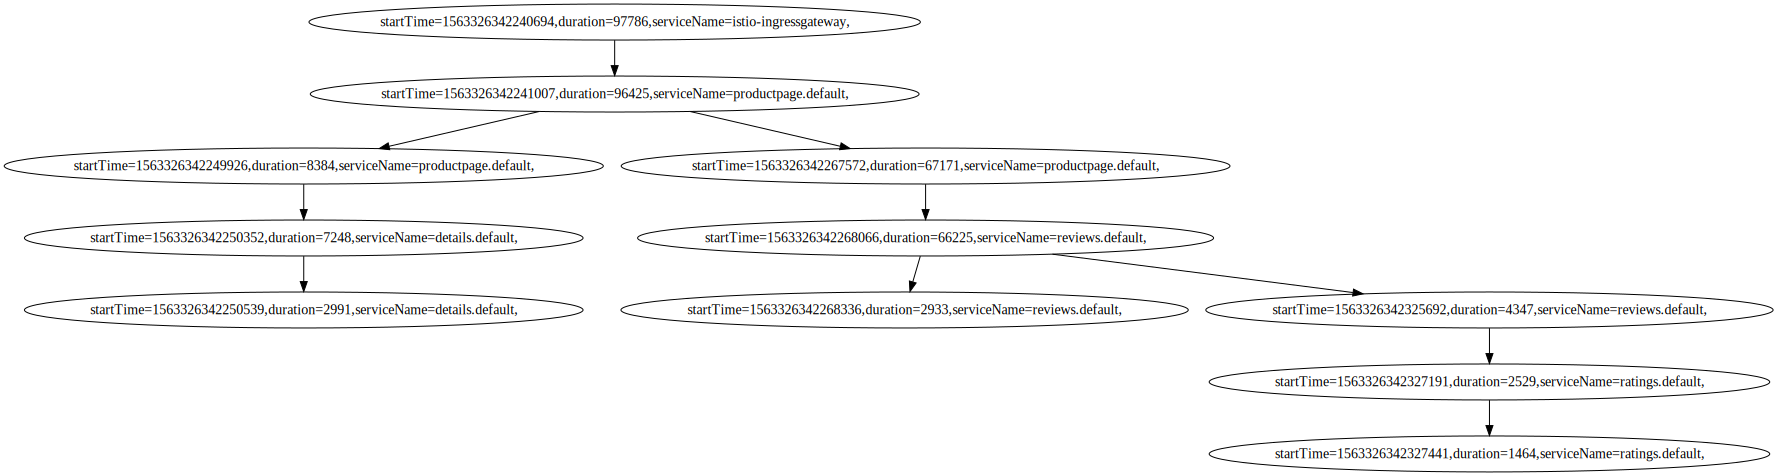

In [26]:
draw_graph(root.transform(rules_timing).collapse(), 'timing')

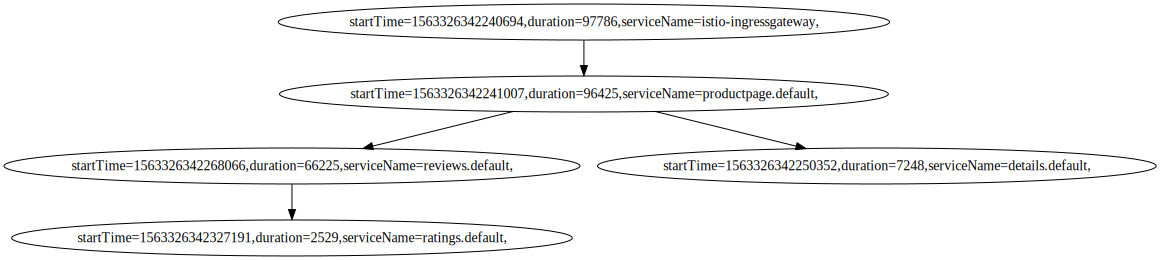

In [27]:
draw_graph(root.transform(rules_timing).collapse(['serviceName']), 'timing')

In [28]:
root.transform(rules_timing).collapse(['serviceName']).formula(['serviceName'])

{'serviceName=istio-ingressgateway,': [{'faults': ['serviceName=productpage.default,'],
   'before-anchor': 'serviceName=productpage.default,',
   'event': 'START'},
  {'faults': ['serviceName=productpage.default,'],
   'before-anchor': 'serviceName=productpage.default,',
   'event': 'END'}],
 'serviceName=productpage.default,': [{'faults': ['serviceName=details.default,',
    'serviceName=reviews.default,'],
   'before-anchor': 'serviceName=details.default,',
   'event': 'START'},
  {'faults': ['serviceName=details.default,', 'serviceName=reviews.default,'],
   'before-anchor': 'serviceName=details.default,',
   'event': 'END'},
  {'faults': ['serviceName=reviews.default,'],
   'before-anchor': 'serviceName=reviews.default,',
   'event': 'START'},
  {'faults': ['serviceName=reviews.default,'],
   'before-anchor': 'serviceName=reviews.default,',
   'event': 'END'}],
 'serviceName=details.default,': [],
 'serviceName=reviews.default,': [{'faults': ['serviceName=ratings.default,'],
   'b